# Proyecto 03 - Series de Tiempo

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

### 1. Preparación del Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from tensorflow import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_2017 = pd.read_csv('/content/drive/MyDrive/Data Science - certificación/Módulo 3/Proyecto Nº3 - series de tiempo/Proyecto Nº3/flujo-vehicular-2017.csv', sep =',')
data_2018 = pd.read_csv('/content/drive/MyDrive/Data Science - certificación/Módulo 3/Proyecto Nº3 - series de tiempo/Proyecto Nº3/flujo-vehicular-2018.csv', sep =',')
data_2019 = pd.read_csv('/content/drive/MyDrive/Data Science - certificación/Módulo 3/Proyecto Nº3 - series de tiempo/Proyecto Nº3/flujo-vehicular-2019.csv', sep =',')

In [ ]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


Para comenzar a trabar, pasaré la fecha a formato datatime.

In [ ]:
data_2019['fecha'] = pd.to_datetime(data_2019.fecha)
data_2019.head()

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


Verifico

In [ ]:
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   periodo         812153 non-null  int64         
 1   fecha           812153 non-null  datetime64[ns]
 2   hora_inicio     812153 non-null  int64         
 3   hora_fin        812153 non-null  int64         
 4   dia             812153 non-null  object        
 5   estacion        812153 non-null  object        
 6   sentido         812153 non-null  object        
 7   tipo_vehiculo   812153 non-null  object        
 8   forma_pago      812153 non-null  object        
 9   cantidad_pasos  812153 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 62.0+ MB


In [ ]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


In [ ]:
data_2018['fecha'] = pd.to_datetime(data_2018.fecha)
data_2018.head()

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


In [ ]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


In [ ]:
data_2017['fecha'] = pd.to_datetime(data_2017.fecha)
data_2017.head()

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [ ]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [ ]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [ ]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [ ]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


##### Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**


In [ ]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
80,2019-01-01,2,Martes,Centro,Liviano,537
86,2019-01-01,2,Martes,Centro,Pesado,1
88,2019-01-01,2,Martes,Provincia,Liviano,443
94,2019-01-01,2,Martes,Provincia,Pesado,1
149,2019-01-01,3,Martes,Centro,Liviano,769


In [ ]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [ ]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [ ]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
1,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00
2,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
3,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00
4,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
...,...,...,...,...,...
238864,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238865,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238866,Martes,Centro,Liviano,580,2019-12-31 22:00:00
238867,Martes,Centro,Liviano,214,2019-12-31 23:00:00


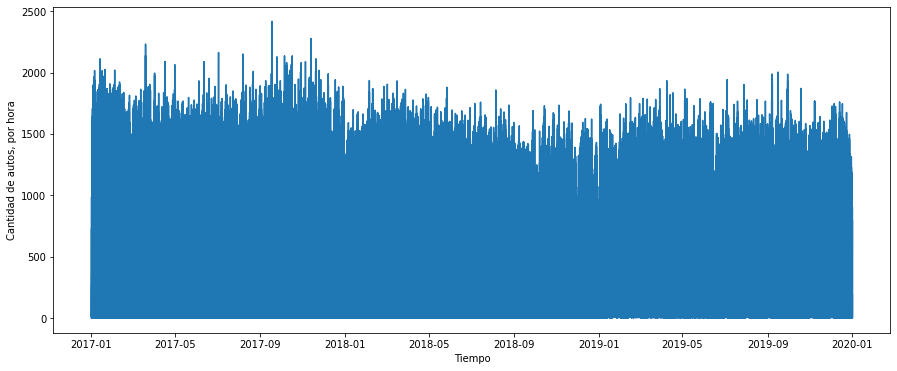

In [ ]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

In [ ]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


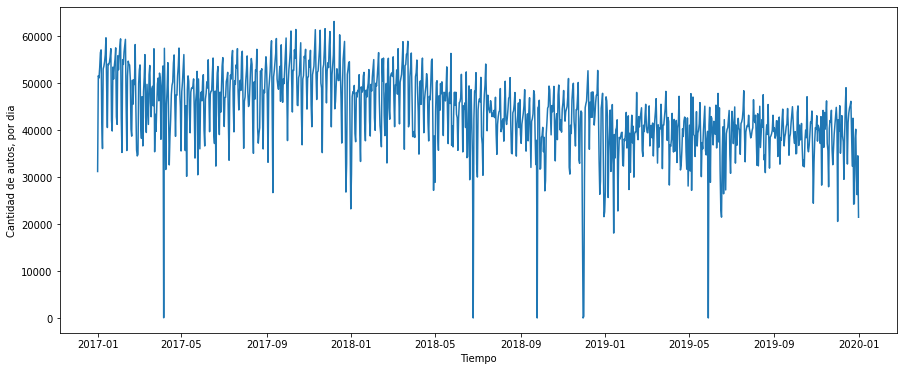

In [ ]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

Referencias para comenzar a trabajar

Introducción al Análisis de Series Cronológicas con Python y Pandas

https://medium.com/datos-y-ciencia/introducci%C3%B3n-al-an%C3%A1lisis-de-series-cronol%C3%B3gicas-con-python-y-pandas-99fc8d4bb56d

# **Proyecto Nº 3 - Autopista Illia- pago en efectivo**

**1- Exploración de datos**

Referencias utilizadas para el desarrollo de la sección: \\
* https://medium.com/datos-y-ciencia/introducci%C3%B3n-al-an%C3%A1lisis-de-series-cronol%C3%B3gicas-con-python-y-pandas-99fc8d4bb56d

* https://www.machinelearningplus.com/time-series/time-series-analysis-python/

*  https://ichi.pro/es/introduccion-al-analisis-de-series-de-tiempo-con-pandas-en-python-237038615414017

En esta etapa de análisis se procederá a relevar las características de la serie temporal tomando como punto de partida la candidad de vehículos por año, para la cabina de pago en efectivo en la Autopista Illia. \\

Para el análisis se incluye: \\

* Visualización del comportamiento de la serie
* Se abordarán las siguientes preguntas: ¿Cuál es la cantidad de tráfico acumulado por año? ¿Cómo es el comportamiento del tráfico acumulado en cada uno de los días para el total de los años?
* Se estudiará la autocorrelación por año
* Se trabajará con la detección de Outliers
* Componente de la serie
* Transformación para estacionalidad






**1.1 Comportamiento de la serie**

Punto de partida:

In [ ]:
diario

,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486
...,...
2019-12-27,40182
2019-12-28,30681
2019-12-29,26259


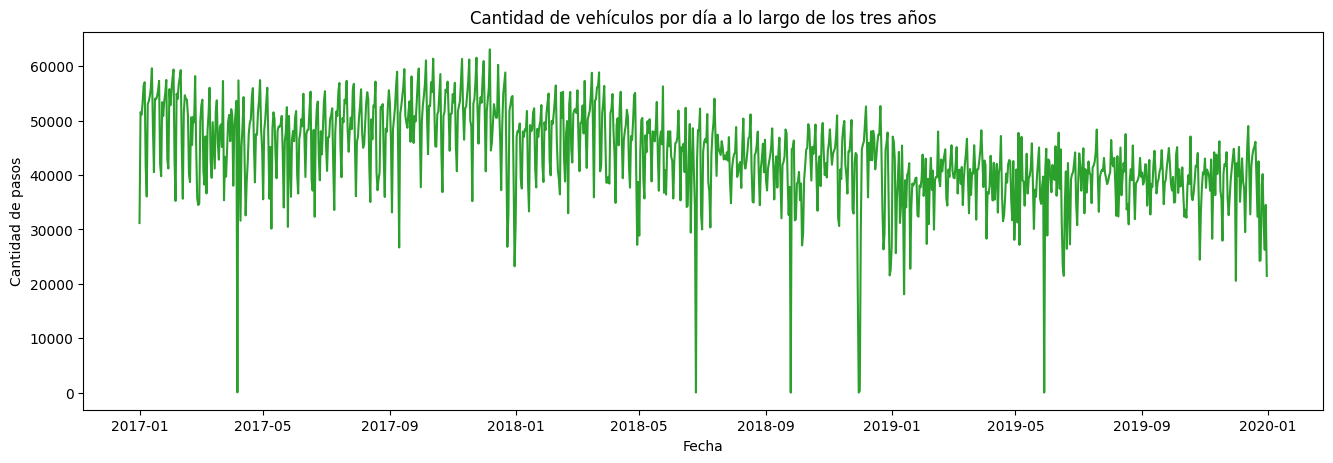

In [ ]:

### Función para el ploteo de la serie.

def plot_df(diario, x, y, title="", xlabel='Fecha', ylabel='Cantidad de pasos', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:green')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(diario, x=diario.index, y=diario.cantidad_pasos, title='Cantidad de vehículos por día a lo largo de los tres años')    

Observaciones: \\
A simple vista, se observan que hubo determinados días con tráfico inusual, podría deberse a una situación de corte de ruta, o una falta de registro de tráfico por algún motivo. Esta situación se cuantificará en la sección de "Detección de outliers".

* ¿Cuál es la cantidad de tráfico acumulado por año? ¿Cómo es el comportamiento de las cantidades para cada uno de los meses? ¿Cómo es el comportamiento del tráfico acumulado en cada uno de los días para el total de los años?

Para poder responder la pregunta, utilizaré un boxplot para cada año y para cada día uno de los días tomando un mes de referencia de 31 días.

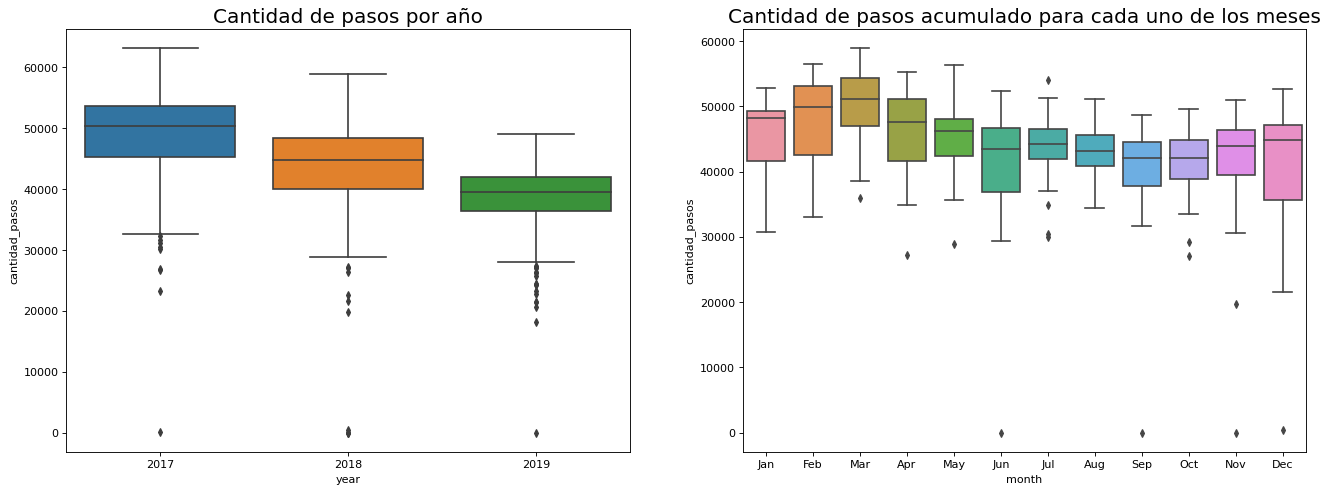

In [ ]:
import seaborn as sns
# Import Data
diario.reset_index(inplace=True)

# Prepare data
diario['year'] = [d.year for d in diario.fecha]
diario['day'] = [d.day for d in diario.fecha]
diario['month'] = [d.strftime('%b') for d in diario.fecha]
years = diario['year'].unique()
days=diario['day'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='cantidad_pasos', data=diario, ax=axes[0])
sns.boxplot(x='month', y='cantidad_pasos', data=diario.loc[~diario.year.isin([2017, 2019]), :])


# Set Title
axes[0].set_title('Cantidad de pasos por año', fontsize=18); 
axes[1].set_title('Cantidad de pasos acumulado para cada uno de los meses', fontsize=18)


plt.show()

Observaciones predominantes: \\

* Se puede observar cómo fue disminuyendo el tráfico a lo largo de los años. La explicación puede ser por la masificación del telepase, cada vez es menos común el uso del dinero en efectivo para efectuar los pagos. \\
* Con respecto a la comparación del acumulado a lo largo de los meses, se puede observar que un acumulado de mayor tráfico en los meses de junio y  diciembre, coindidente con épocas de recesos.

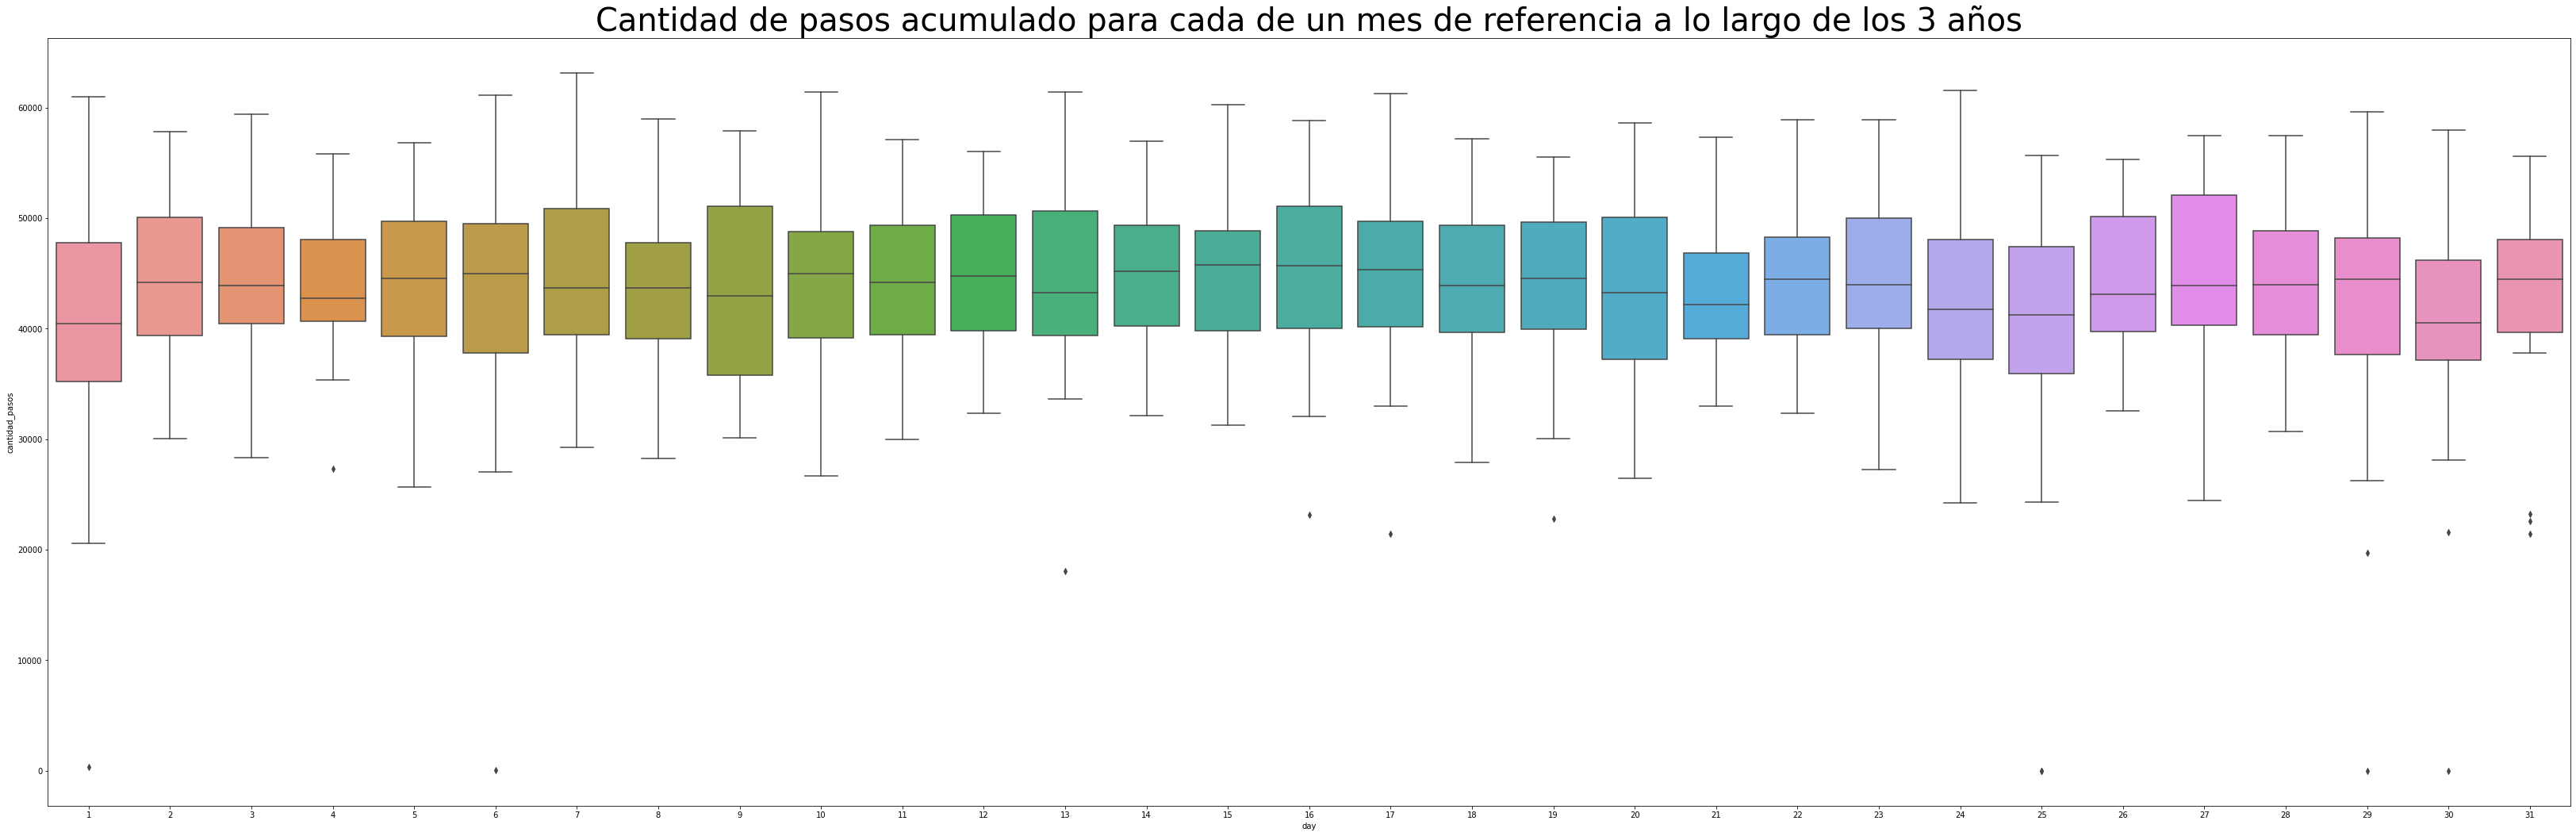

In [ ]:
plt.figure(figsize = (19*3,17.8))
sns.boxplot(x='day', y='cantidad_pasos', data=diario.loc[~diario.day.isin([2017, 2019]), :])
plt.title('Cantidad de pasos acumulado para cada de un mes de referencia a lo largo de los 3 años', fontsize=40)
plt.show()

Para este caso, no se observa una tendencia predominante en lo que respecta a la cantidad de pasos totales para algún día en particular. 

**1.2 Autocorrelación por año**

En primera instancia, se estudiará la autocorrelación por año


Volviendo a colocar la fecha como índice



In [ ]:
diario.set_index('fecha',inplace=True)

In [ ]:
diario

,cantidad_pasos,year,day,month
fecha,,,,
2017-01-01,31183,2017,1,Jan
2017-01-02,51568,2017,2,Jan
2017-01-03,51093,2017,3,Jan
2017-01-04,53332,2017,4,Jan
2017-01-05,56486,2017,5,Jan
...,...,...,...,...
2019-12-27,40182,2019,27,Dec
2019-12-28,30681,2019,28,Dec
2019-12-29,26259,2019,29,Dec


Autocorrelación por año 

**2017**

In [ ]:
diario['2017-01-01':'2017-12-31'].cantidad_pasos.shape

(365,)

In [ ]:
from statsmodels.tsa.stattools import acf

nlags =  364  ###Cantidad de muestras. 
autocorr = acf(diario['2017-01-01':'2017-12-31'].cantidad_pasos, nlags = nlags)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning:

fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.



In [ ]:
autocorr.shape

(365,)

Text(0.5, 0, 'lag')

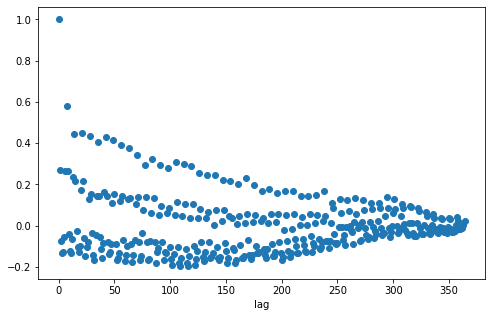

In [ ]:
plt.figure(figsize = (8,5))
plt.scatter(np.arange(nlags+1), autocorr)
plt.xlabel('lag')

**2018**

In [ ]:
nlags =  364  ###Cantidad de muestras. 
autocorr = acf(diario['2018-01-01':'2018-12-31'].cantidad_pasos, nlags = nlags)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning:

fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.



Text(0.5, 0, 'lag')

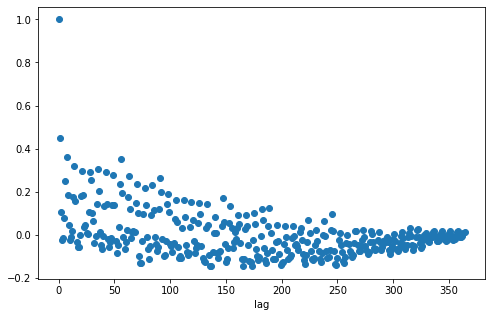

In [ ]:
plt.figure(figsize = (8,5))
plt.scatter(np.arange(nlags+1), autocorr)
plt.xlabel('lag')

**2019**

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning:

fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.



Text(0.5, 0, 'lag')

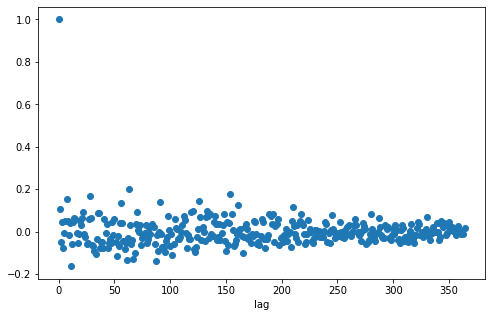

In [ ]:
nlags =  364  ###Cantidad de muestras. 
autocorr = acf(diario['2019-01-01':'2019-12-31'].cantidad_pasos, nlags = nlags)

plt.figure(figsize = (8,5))
plt.scatter(np.arange(nlags+1), autocorr)
plt.xlabel('lag')

Observaciones predominantes: \\

* En el 2019 se puede apreciar una correlación más uniforme respecto al 2017 y el 2018. 
* El 2017 es el año donde se puede apreciar la menor correlación. 
* Al aumentar el muestreo se observa la convergencia a cero, por lo que en los 3 años, futuras predicciones se pueden hacer muy bien con los valores anteriores más cercanos.

Observando todos los años juntos

**2017-2018-2019**

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning:

fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.



Text(0.5, 0, 'lag')

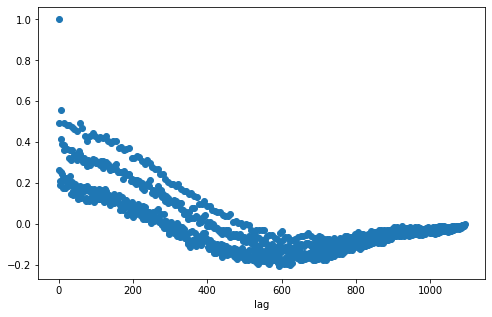

In [ ]:
nlags =  364*3  ###Por los tres años
autocorr = acf(diario.cantidad_pasos, nlags = nlags)

plt.figure(figsize = (8,5))
plt.scatter(np.arange(nlags+1), autocorr)
plt.xlabel('lag')

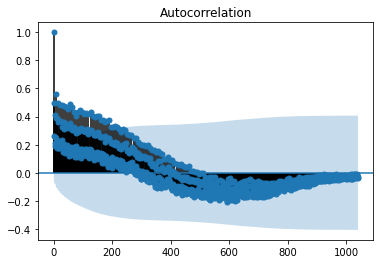

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(diario.cantidad_pasos, lags = 52*20)
plt.show()

Observación: \\

En el gráfico se puede observar que la cantidad de pasos de vehículos caen dentro de las bandas de correlación. Lo que significa que para un modelo de predicción, se pueden tomar los valores de pasos hacia atrás tanto como se quieran para predecir los valores futuros. \\

Esta observación es válida para los tres años de análisis. 

**Máximo tráfico semanal por total y por año - aspectos cuantitativos complemento a los gráficos**

In [ ]:
data_semanal_max = diario.resample('W').max() # resampleo por semana
data_semanal_max

,cantidad_pasos,year,day,month
fecha,,,,
2017-01-01,31183,2017,1,Jan
2017-01-08,57081,2017,8,Jan
2017-01-15,59651,2017,15,Jan
2017-01-22,57337,2017,22,Jan
2017-01-29,57506,2017,29,Jan
...,...,...,...,...
2019-12-08,45181,2019,8,Dec
2019-12-15,49027,2019,15,Dec
2019-12-22,46128,2019,22,Dec


In [ ]:
data_semanal_max.max()   #### Mayor cantidad de tráfico semanal en los tres años

cantidad_pasos    63127
year               2019
day                  31
month               Sep
dtype: object

In [ ]:
data_semanal_max

,cantidad_pasos,year,day,month
fecha,,,,
2017-01-01,31183,2017,1,Jan
2017-01-08,57081,2017,8,Jan
2017-01-15,59651,2017,15,Jan
2017-01-22,57337,2017,22,Jan
2017-01-29,57506,2017,29,Jan
...,...,...,...,...
2019-12-08,45181,2019,8,Dec
2019-12-15,49027,2019,15,Dec
2019-12-22,46128,2019,22,Dec


In [ ]:
data_semanal_max.index

DatetimeIndex(['2017-01-01', '2017-01-08', '2017-01-15', '2017-01-22',
               '2017-01-29', '2017-02-05', '2017-02-12', '2017-02-19',
               '2017-02-26', '2017-03-05',
               ...
               '2019-11-03', '2019-11-10', '2019-11-17', '2019-11-24',
               '2019-12-01', '2019-12-08', '2019-12-15', '2019-12-22',
               '2019-12-29', '2020-01-05'],
              dtype='datetime64[ns]', name='fecha', length=158, freq='W-SUN')

In [ ]:
data_semanal_max.cantidad_pasos['2019-01-01':'2019-12-31'].loc[data_semanal_max.cantidad_pasos['2019-01-01':'2019-12-31'].idxmax()]   ### Máximo en el 2019

49027

In [ ]:
data_semanal_max.cantidad_pasos['2018-01-01':'2018-12-31'].loc[data_semanal_max.cantidad_pasos['2018-01-01':'2018-12-31'].idxmax()]   ### Máximo en el 2018

58905

In [ ]:
data_semanal_max.cantidad_pasos['2017-01-01':'2017-12-31'].loc[data_semanal_max.cantidad_pasos['2017-01-01':'2017-12-31'].idxmax()]   ### Máximo en el 2017

63127

Cantidad de tráfico por día

In [ ]:
data_dia_max = diario.resample('d').max() # resampleo por día

In [ ]:
data_dia_max.max() 

cantidad_pasos    63127
year               2019
day                  31
month               Sep
dtype: object

In [ ]:
data_dia_max.cantidad_pasos['2019-01-01':'2019-12-31'].loc[data_dia_max.cantidad_pasos['2019-01-01':'2019-12-31'].idxmax()]   ### Máximo en el 2019

49027

In [ ]:
data_dia_max.cantidad_pasos['2018-01-01':'2018-12-31'].loc[data_dia_max.cantidad_pasos['2018-01-01':'2018-12-31'].idxmax()]   ### Máximo en el 2018

58905

In [ ]:
data_dia_max.cantidad_pasos['2017-01-01':'2017-12-31'].loc[data_dia_max.cantidad_pasos['2017-01-01':'2017-12-31'].idxmax()]   ### Máximo en el 2017

63127

Text(0.5, 1.0, 'Cantidad de pasos por semana')

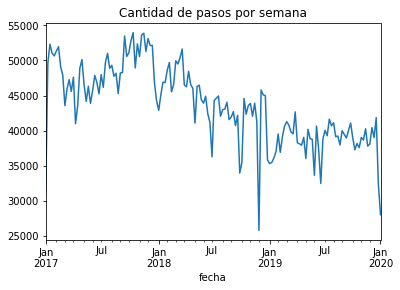

In [ ]:
#Resampleo por semana
diario.cantidad_pasos.resample('W').mean()
#Plot por semana
diario.cantidad_pasos.resample('W').mean().plot()
plt.title("Cantidad de pasos por semana")


**1.3 Detección de Outliers**

De acuerdo a la pista, analizando el primer semestre 2019.

**2019**

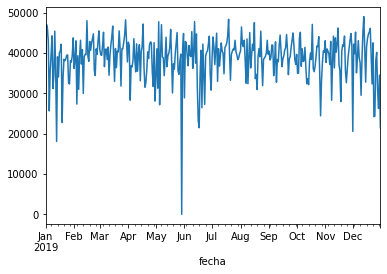

In [ ]:
diario['2019-01-01':'2019-12-31'].cantidad_pasos.plot()

Días con mayor tráfico

In [ ]:
diario['2019-01-01':'2019-12-31'].loc[diario['2019-01-01':'2019-12-31']['cantidad_pasos'].idxmax()]

cantidad_pasos    49027
year               2019
day                  13
month               Dec
Name: 2019-12-13 00:00:00, dtype: object

In [ ]:
diario['2019-01-01':'2019-12-31'].loc[diario['2019-01-01':'2019-12-31']['cantidad_pasos'].idxmin()]

cantidad_pasos       0
year              2019
day                 29
month              May
Name: 2019-05-29 00:00:00, dtype: object

Se observa que para el 29 de mayo no hubo tráfico. De acuerdo a la información de la fecha no hubo ninguna información de cortes, lo que hace pensar que es un dato faltante.

**2018**

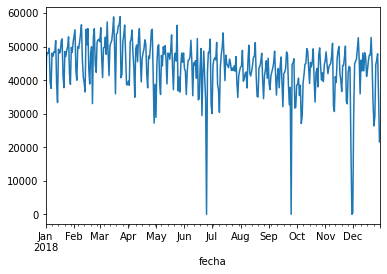

In [ ]:
diario['2018-01-01':'2018-12-31'].cantidad_pasos.plot()

Se observan tres fechas de tráfico más bajo de la media.

**2017**

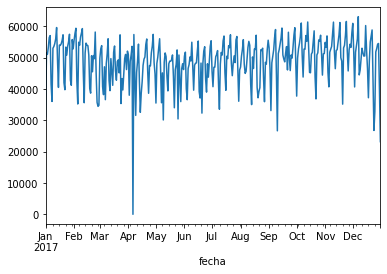

In [ ]:
diario['2017-01-01':'2017-12-31'].cantidad_pasos.plot()

In [ ]:
diario

,cantidad_pasos,year,day,month
fecha,,,,
2017-01-01,31183,2017,1,Jan
2017-01-02,51568,2017,2,Jan
2017-01-03,51093,2017,3,Jan
2017-01-04,53332,2017,4,Jan
2017-01-05,56486,2017,5,Jan
...,...,...,...,...
2019-12-27,40182,2019,27,Dec
2019-12-28,30681,2019,28,Dec
2019-12-29,26259,2019,29,Dec


Procedo a eliminar las filas que contienen valores menores que 50, sugiriendo esta cota para identificar los días con tráfico fuera de lo habitual.

In [ ]:
diario = diario.drop(diario[diario['cantidad_pasos']<50].index)



Verifico que se haya eliminado

Text(0.5, 1.0, 'Cantidad de pasos por fecha')

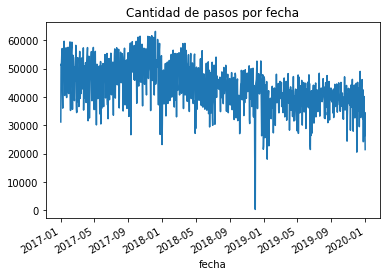

In [ ]:
diario.cantidad_pasos.plot()
plt.title('Cantidad de pasos por fecha')

**1.3 Componentes de la serie**

**1.3.1 Test de Estacionalidad**

Se puede decir que una serie es estacionaria cuando su media y su varianza no están en función del tiempo, es decir, son constantes en el tiempo.
La estacionariedad es importante porque la mayoría de los métodos estadísticos para realizar análisis y predicciones se basan en la suposición de que las propiedades estadísticas de la serie (media, varianza, correlación, etc.) son constantes en el tiempo.

¿Cómo comprobar la estacionariedad? \\
La estacionariedad se puede evaluar de dos maneras: \\
Inspeccionando visualmente las observaciones y verificando si las propiedades estadísticas son constantes en el tiempo. \\
Realizando la prueba de Dickey-Fuller.

Referencia: https://quantspace.es/2020/08/01/analisis-de-series-temporales-con-python-parte-2/

Prueba de Dickey Fuller Aumentada
El test estadístico de referencia utilizado para conocer si una serie es o no estacionaria es a la prueba de Dickey Fuller aumentada (ADF). En esta prueba se evalúa la hipótesis nula que confirma que existe una raíz unitaria en la serie temporal. El test devuelve un número decimal. Cuanto más negativo es este valor, mayor es la probabilidad de rechazar la hipótesis nula, confirmando que en la serie temporal no hay raíces unitarias. Lo cual implica aceptar que nos encontramos ante una serie estacionaria con un cierto grado de probabilida

En concreto, con la siguiente referencia más específica: https://towardsdatascience.com/what-is-stationarity-in-time-series-and-why-should-you-care-f3b45082356b

Analíticamente, la primer aproximación de esto es ver si la media y la varianza varían con el tiempo. \\

Para esto realizará una partición de la muestra (cantidad de pasos) y se verificará para cada conjunto el valor de la media y la varianza.

In [ ]:

from pandas import read_csv
from matplotlib import pyplot
from numpy import log

X = diario.cantidad_pasos
X = log(X)
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('media1=%f, media2=%f' % (mean1, mean2))
print('varianza1=%f, varianza2=%f' % (var1, var2))


media1=10.766469, media2=10.574746
varianza1=0.025177, varianza2=0.065630


Al particionar y analizar dos conjuntos de datos, se observa que no hay variación significativa de la media y la varianza.

Ahora, utilizando las herramientas dentro de la librería de estadísticas.

Analíticamente, con el test de adfuller, para determinar si es estacionaria

In [ ]:
from statsmodels.tsa.stattools import adfuller


In [ ]:
adf=adfuller(diario.cantidad_pasos,maxlag=1)
print('Resultado del test es ', adf[0])
print('El P-Value es :', adf[1])
print('Valores críticos', adf[4])

Resultado del test es  -17.797297226826895
El P-Value es : 3.228794490057509e-30
Valores críticos {'1%': -3.436369082756128, '5%': -2.8641976875421524, '10%': -2.5681850407995137}


Para la interpretación de resultados, utilizando como referencia:

* https://machinelearningmastery.com/time-series-data-stationary-python/#:~:text=Augmented%20Dickey%2DFuller%20test,or%20fail%20to%20be%20reject.&text=Null%20Hypothesis%20(H0)%3A%20If,meaning%20it%20is%20non%2Dstationary

"p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary" 

Por lo tanto, esta serie sería estacionaria. \\

Además, el valor del test de estacionalidad es de aproximadamente -17.79, mucho menor al 1% de los valores críticos. Esto es otro indicio de que estaríamos en presencia de una serie estable. 

Referencia: https://unipython.com/analisis-de-series-temporales-con-la-libreria-pandas/

Referencia: https://www.youtube.com/watch?v=NeRjp3GIJgA

Por otro lado, con la diferenciación de series como estrategia para hacerla más estacionaria, se obtiene el siguiente resultado.

In [ ]:
adf2=adfuller(diario['cantidad_pasos'].diff().dropna())
adf2

(-12.465344273884334,
 3.335250968556825e-23,
 19,
 1069,
 {'1%': -3.4364819663568262,
  '10%': -2.568211560046239,
  '5%': -2.864247479652846},
 21290.67493674925)

A partir de la referencia citada, implemento función para plotear la serie, así como la variación en ventanas de tiempo de la media y la varianza. 




In [ ]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Ventana para la media y la desviación estándar')
    plt.show(block=False)
    

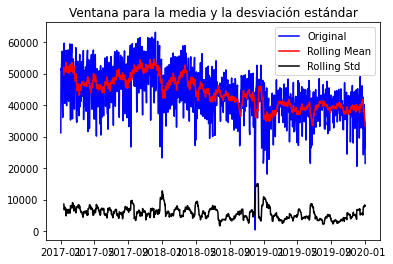

In [ ]:
test_stationarity(diario.cantidad_pasos)


Al graficar la ventana de la media y la desviación estándar, se observa que no hay una variación significativa entre ellas en el tiempo.

https://www.programcreek.com/python/example/95127/statsmodels.tsa.stattools.adfuller

**1.3.2 Transformaciones**

Existen algunas técnicas que uno puede aplicar para estacionarizar una serie cronológica: \\

Transformación: aplicar una transformación que penalice a los valores más altos y no tanto a los valores más pequeños. Estas transformaciones pueden ser logaritmo, raíz cuadrada, raíz cúbica, etc. Este método ayuda a reducir la tendencia. \\

Diferenciación: tomar la diferencia de la observación en un instante en particular con la de un punto anterior en el tiempo. Esto ayuda a la reducción de la tendencia y la estacionalidad, y por ende mejora la estacionariedad.

In [ ]:
# Transformar el dataframe
ts_log = np.log(diario.cantidad_pasos)
# Reemplazar infs con NaN
ts_log.replace([np.inf, -np.inf], np.nan, inplace=True)
# Remover todos los valores NaN
ts_log.dropna(inplace=True)

Se puede aplicar una técnica de suavizamiento sobre el conjunto de datos transformado para eliminar el ruido que puede estar presente. Una técnica de suavizamiento común es restar la media móvil del conjunto de datos. Con Python podemos lograr esto tan fácil como:

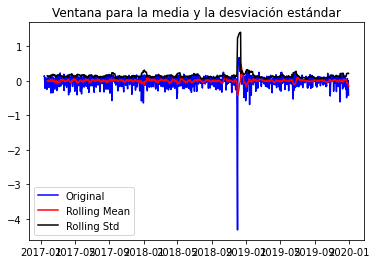

In [ ]:
# Obtener la media móvil de la serie
moving_avg = ts_log.rolling(12).mean() # 12 meses
# Sustraer la media móvil del dataframe log-transformado
ts_log_moving_avg_diff = ts_log - moving_avg
# Remover valores NaN
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

Para aplicar la diferenciación

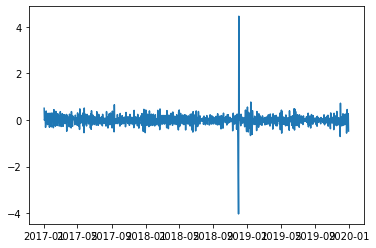

In [ ]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

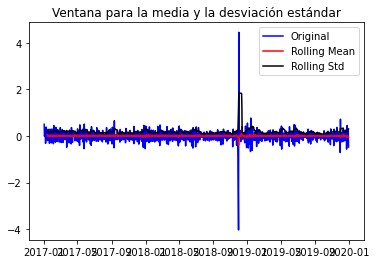

In [ ]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

Con la transformación logarítmica y la diferenciación el valor de “Test Statistic” es significativamente menor que los valores críticos, por lo tanto, esta serie es más estacionaria que la serie original.

Conclusión preliminar de la sección 1.3 \\

Cuando nos enfrentamos a una tarea predictiva que involucra una serie cronológica, necesitamos analizar la serie y determinar si es estacionaria o no. Para determinar la estacionariedad, podemos trazar los datos e inspeccionar visualmente la media y otras propiedades estadísticas, o realizar una prueba de Dickey-Fuller y mirar Test Statistic y los valores críticos. En caso de que la serie resulte ser no estacionaria, podemos aplicar técnicas como la transformación o la diferenciación para estacionarizar la serie.

**1.4 Descomposición de las componentes de la serie de tiempo**

Referencia: bitácora 41 -Serie de tiempo- Acámica

Punto de partida:

In [ ]:
diario.cantidad_pasos

fecha
2017-01-01    31183
2017-01-02    51568
2017-01-03    51093
2017-01-04    53332
2017-01-05    56486
              ...  
2019-12-27    40182
2019-12-28    30681
2019-12-29    26259
2019-12-30    34523
2019-12-31    21447
Name: cantidad_pasos, Length: 1090, dtype: int64

In [ ]:
### Descomposición de las componentes de la serie de tiempo
descomposición= sm.tsa.seasonal_decompose(diario.cantidad_pasos,freq=30)

In [ ]:
trend=descomposición.trend ## Descomposición de tendencia
seasonal=descomposición.seasonal ## Descomposición de Estacionariedad
residual=descomposición.resid ## Descomposición del residual

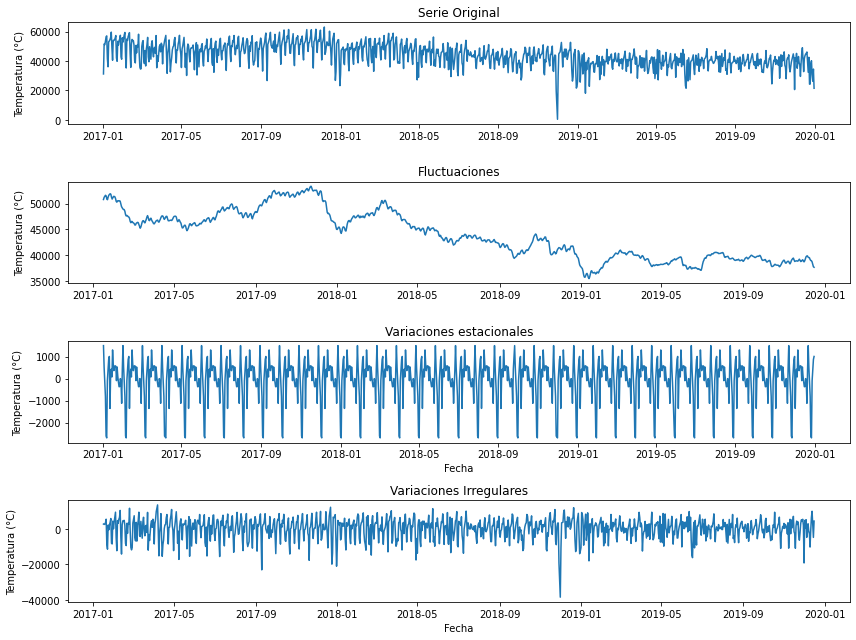

In [ ]:
plt.figure(figsize = (12,9))

plt.subplot(4,1,1)
plt.title('Serie Original')
plt.plot(diario.cantidad_pasos,label='Original')
plt.ylabel('Temperatura (°C)')

plt.subplot(4,1,2)
plt.title('Fluctuaciones')
plt.plot(trend, label='Flunctuaciones')
plt.ylabel('Temperatura (°C)')

plt.subplot(4,1,3)
plt.title('Variaciones estacionales')
plt.plot(seasonal, label='Variaciones Estacionales')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')

plt.subplot(4,1,4)
plt.title('Variaciones Irregulares')
plt.plot(residual, label='Variaciones Irregulares')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')


plt.tight_layout()
plt.show()

Observación predominante: 

* Se observa que el año 2017 se registran las mayores fluctuaciones, seguidos del 2018 y logrando una tendencia con poca variación en el año 2019. \\

Esta observación va en línea con lo estudiado en la sección de correlación, donde se registraban la menor convergencia a cero en el año 2017. \\

* Con respecto a las variaciones estacionales y a las variaciones irregulares se observa un comportamiento regular a lo largo de los tres años.


Referencia: https://towardsdatascience.com/time-series-in-python-exponential-smoothing-and-arima-processes-2c67f2a52788

**1.5 ACF y PACF**

Un gráfico de autocorrelación (ACF) representa la autocorrelación de la serie con rezagos de sí misma. \\
Un gráfico de autocorrelación parcial (PACF) representa la cantidad de correlación entre una serie y un rezago de sí mismo que no se explica por correlaciones en todos los rezagos de orden inferior. \\
Idealmente, no queremos ninguna correlación entre la serie y los retrasos en sí misma. \\

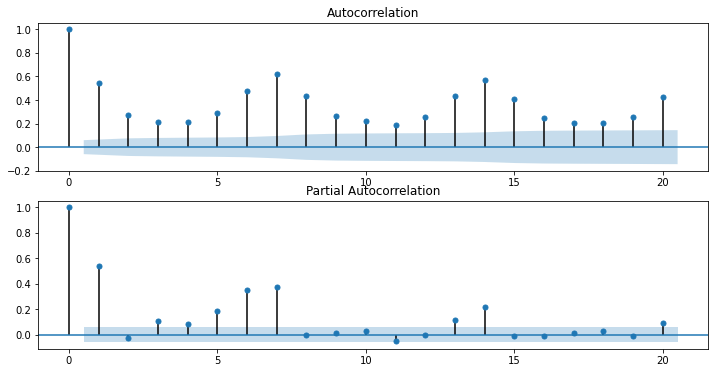

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, figsize=(12,6))
ax[0] = plot_acf(diario.cantidad_pasos.dropna(), ax=ax[0], lags=20)
ax[1] = plot_pacf(diario.cantidad_pasos.dropna(), ax=ax[1], lags=20)

Se observa que muchos picos salen de la zona sombreada, por lo que hay ventanas no estacionarias en la serie. Tema que se tendrá en cuenta en el momento de realizar la predicción a futuro.

#**2 Predicción a futuro**

Se investigará e implementarán las técnicas:

* Suavizado exponencial simple
* Método de Holt's
* One Step Prediction
* Multi Step Prediction
* Librería Prophet

**2.1 Selección de modelos**

Los métodos de suavizado exponencial son apropiados para datos no estacionarios (es decir, datos con tendencia y datos estacionales). \\
Los modelos ARIMA deben usarse solo con datos estacionarios. Por lo tanto, se debe eliminar la tendencia de los datos (mediante deflación o registro) y luego mirar las series diferenciadas.

Referencia: \\
* https://towardsdatascience.com/time-series-in-python-exponential-smoothing-and-arima-processes-2c67f2a52788

*  https://towardsdatascience.com/time-series-in-python-exponential-smoothing-and-arima-processes-2c67f2a52788

Suavizado exponencial simple

¿Cuándo usarlo? Pocos puntos de datos, datos irregulares, sin estacionalidad ni tendencia.




Referencia: https://www.youtube.com/watch?v=7xq5IiZ3HrM

In [ ]:
diario

,cantidad_pasos,year,day,month
fecha,,,,
2017-01-01,31183,2017,1,Jan
2017-01-02,51568,2017,2,Jan
2017-01-03,51093,2017,3,Jan
2017-01-04,53332,2017,4,Jan
2017-01-05,56486,2017,5,Jan
...,...,...,...,...
2019-12-27,40182,2019,27,Dec
2019-12-28,30681,2019,28,Dec
2019-12-29,26259,2019,29,Dec


**2.2 Simple Exponential Smoothin**

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [ ]:
train=diario['2017-01-01':]
test=diario['2018-01-01':]

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



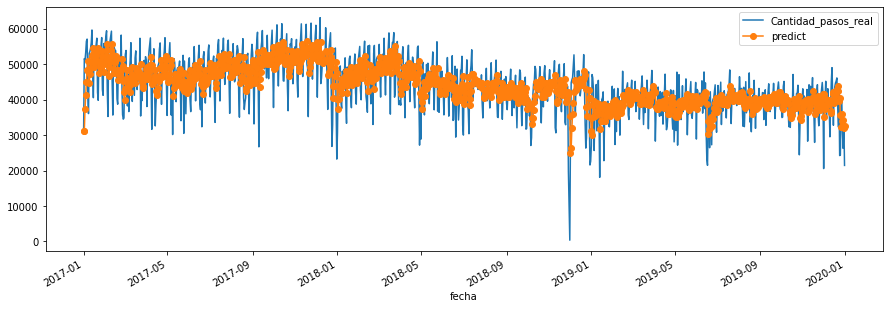

In [ ]:
fit1=SimpleExpSmoothing(train['cantidad_pasos']).fit(smoothing_level=0.3, optimized=False)
fcast1=fit1.predict(0)

## plot
plt.figure(figsize=(15,5))
plt.plot(train['cantidad_pasos'], label='Cantidad_pasos_real')
fcast1.plot(marker='o', label="predict",legend=True)
plt.legend(loc='best')
plt.show()

Observación preliminar: sigue el comportamiento pero presenta diferencias en los valores picos de la serie.

Parámetros del ajuste

In [ ]:
fit1.params

{'damping_slope': nan,
 'initial_level': 31183.0,
 'initial_seasons': array([], dtype=float64),
 'initial_slope': nan,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.3,
 'smoothing_seasonal': None,
 'smoothing_slope': None,
 'use_boxcox': False}

In [ ]:
fit1.fittedvalues

fecha
2017-01-01    31183.000000
2017-01-02    31183.000000
2017-01-03    37298.500000
2017-01-04    41436.850000
2017-01-05    45005.395000
                  ...     
2019-12-27    33982.099953
2019-12-28    35842.069967
2019-12-29    34293.748977
2019-12-30    31883.324284
2019-12-31    32675.226999
Length: 1090, dtype: float64

Parámetros del pronóstico

In [ ]:
fit1.fittedfcast

array([31183.        , 31183.        , 37298.5       , ...,
       31883.32428377, 32675.22699864, 29306.75889905])

In [ ]:
train.loc[:,'SES']=fit1.fittedvalues.tolist();
train

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,cantidad_pasos,year,day,month,SES
fecha,,,,,
2017-01-01,31183,2017,1,Jan,31183.000000
2017-01-02,51568,2017,2,Jan,31183.000000
2017-01-03,51093,2017,3,Jan,37298.500000
2017-01-04,53332,2017,4,Jan,41436.850000
2017-01-05,56486,2017,5,Jan,45005.395000
...,...,...,...,...,...
2019-12-27,40182,2019,27,Dec,33982.099953
2019-12-28,30681,2019,28,Dec,35842.069967
2019-12-29,26259,2019,29,Dec,34293.748977


Con la columna SES, podemos observar el pronóstico correspondiente a "Cantidad de pasos"

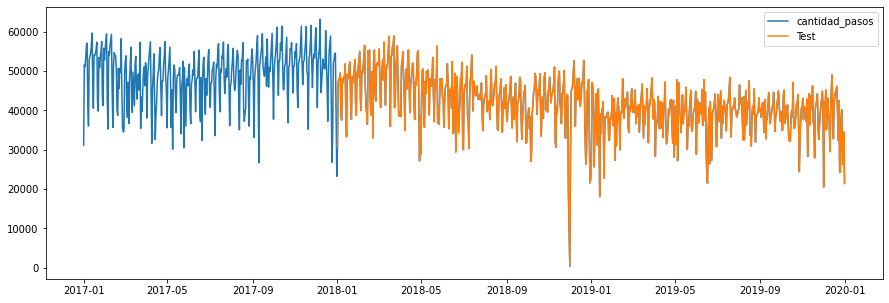

In [ ]:
y_hat_avg=test.copy()
fit1=SimpleExpSmoothing(np.asarray(train['cantidad_pasos'])).fit(smoothing_level=0.3, optimized=False)
y_hat_avg['SES']=fit1.forecast(len(test))

plt.figure(figsize=(15,5))
plt.plot(diario['cantidad_pasos'],label='cantidad_pasos')
plt.plot(test['cantidad_pasos'],label='Test')
#plt.plot(y_hat_avg['SES'], marker='o', label='SES')

plt.legend(loc='best')
plt.show()

In [ ]:
fit1.fittedvalues

array([31183.        , 31183.        , 37298.5       , ...,
       34293.74897681, 31883.32428377, 32675.22699864])

In [ ]:
fit1.fittedfcast

array([31183.        , 31183.        , 37298.5       , ...,
       31883.32428377, 32675.22699864, 29306.75889905])

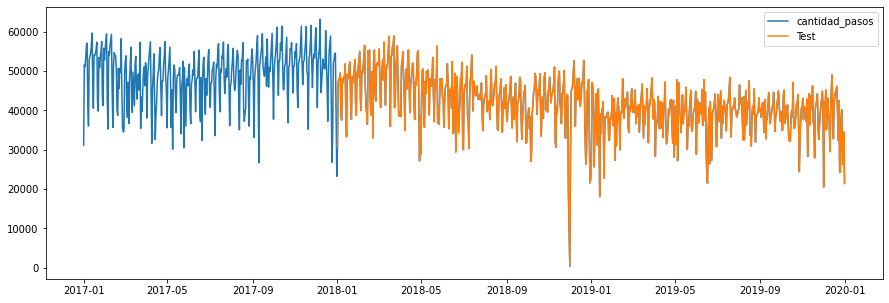

In [ ]:
fit2=SimpleExpSmoothing(np.asarray(train['cantidad_pasos'])).fit(smoothing_level=0.2, optimized=False)


plt.figure(figsize=(15,5))
plt.plot(diario['cantidad_pasos'],label='cantidad_pasos')
plt.plot(test['cantidad_pasos'],label='Test')
#plt.plot(y_hat_avg['SES'], marker='o', label='SES')



plt.legend(loc='best')
plt.show()

Evaluando el método - medidas de error 

In [ ]:
MAD_2=np.mean(np.absolute(train['cantidad_pasos']['2018-01-01']-train['SES']['2018-01-01':]))
MAD_2

10781.501370543683

**A partir del resultado obtenido, se seleccionará este modelo como Benchmark**

In [ ]:
TS_2=np.sum(train['SES']['2018-01-01':]-train['cantidad_pasos']['2018-01-01':])/MAD_2
TS_2

3.3542690068245933

**2.3 Método de Holt's**

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



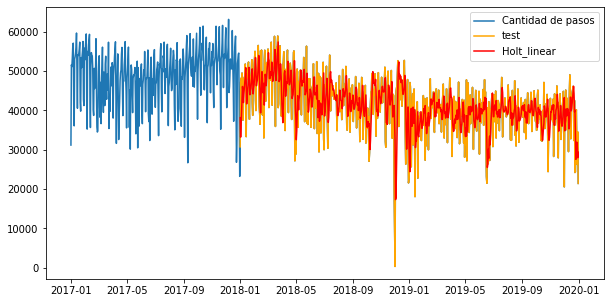

In [ ]:
y_hat_avg=test.copy()

fit1=Holt(train['cantidad_pasos']).fit(smoothing_level=0.32, smoothing_slope=0.28)
y_hat_avg['Holt_linear']=fit1.predict(0)

plt.figure(figsize=(10,5))
plt.plot(train['cantidad_pasos'],label='Cantidad de pasos')
plt.plot(test['cantidad_pasos'], label= 'test', color='orange')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear', color= 'red')
plt.legend(loc='best')
plt.show()

In [ ]:
y_hat_avg

,cantidad_pasos,year,day,month,Holt_linear
fecha,,,,,
2018-01-01,30735,2018,1,Jan,38141.475119
2018-01-02,47130,2018,2,Jan,33203.918200
2018-01-03,48162,2018,3,Jan,36340.556424
2018-01-04,47953,2018,4,Jan,39862.911760
2018-01-05,49505,2018,5,Jan,42916.105296
...,...,...,...,...,...
2019-12-27,40182,2019,27,Dec,29195.083493
2019-12-28,30681,2019,28,Dec,31933.405097
2019-12-29,26259,2019,29,Dec,30642.928291


Se puede observar la relación entre el resultado de la predicción de Holt_linear con la cantidad de pasos.

Medidas de error

In [ ]:
MAD_3=np.mean(np.absolute(y_hat_avg['cantidad_pasos']-y_hat_avg['Holt_linear']))
MAD_3

5330.09029284245

In [ ]:
TS_3=np.sum(y_hat_avg['Holt_linear']-y_hat_avg['cantidad_pasos'])/MAD_3
TS_3

-1.047443912319322

Conclusión preliminar ede los métodos

El método de suavizado simple es el que presenta el menor error cuadrático medio respecto al método de Holt's. 

Se observa que se encuentran practicamente superpuestos. 

**2.4 One Step Prediction**

Referencia Nº42 - Acámica

Vuelvo a refrescar el número de vehículos por semana

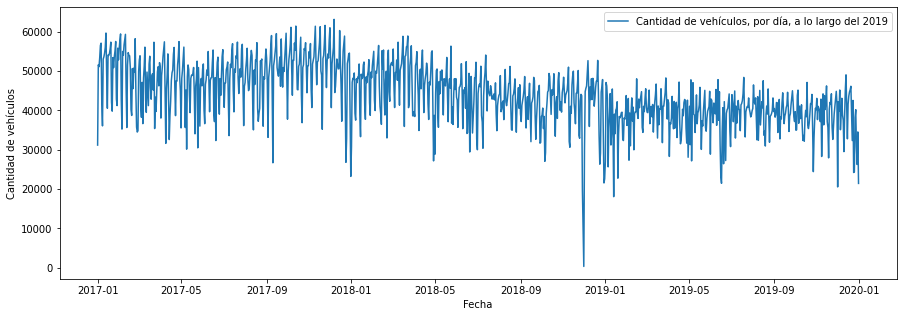

In [ ]:
plt.figure(figsize = (15,5))
plt.plot(diario.index, diario.cantidad_pasos, label = 'Cantidad de vehículos, por día, a lo largo del 2019')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de vehículos')
# plt.xlim(datetime.date(1990,1,1), datetime.date(2018,1,1))
# plt.ylim(-10,40)
plt.legend()
plt.show()

La idea es predecir cómo serán la cantidad de vehículos para el próximo año. Como ya tenemos esa información nos servirá para validar el método utilizado

In [ ]:
cantidad=diario.cantidad_pasos
cantidad.head()

fecha
2017-01-01    31183
2017-01-02    51568
2017-01-03    51093
2017-01-04    53332
2017-01-05    56486
Name: cantidad_pasos, dtype: int64

Valores hacia atrás

In [ ]:
look_back = 5*3   #3 semanas

In [ ]:
N=cantidad.shape[0]

In [ ]:
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

(1074, 15) (1074,)


Llenamos los X e Y

In [ ]:
for i in range(X.shape[0]):
#     X[i,:] = senial.values.iloc[i:i+look_back]
#     y[i] = senial.values.iloc[i+look_back]
    X[i,:] = cantidad.iloc[i:i+look_back]
    y[i] = cantidad.iloc[i+look_back]

In [ ]:
print(X)


[[31183. 51568. 51093. ... 59651. 49014. 40546.]
 [51568. 51093. 53332. ... 49014. 40546. 54061.]
 [51093. 53332. 56486. ... 40546. 54061. 53940.]
 ...
 [49027. 40478. 32774. ... 24349. 38168. 40182.]
 [40478. 32774. 41588. ... 38168. 40182. 30681.]
 [32774. 41588. 43597. ... 40182. 30681. 26259.]]


In [ ]:
print(y)

[54061. 53940. 54468. ... 30681. 26259. 34523.]


La fecha ya no es parte de los datos. Seguidamente hacemos un train test split

In [ ]:
N_train = 5*10 - look_back # cantidad de instancias que vamos a usar para entrenar. 
N_test = 5*5 #cantidad de puntos que vamos a usar para evaluar
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(35, 15) (35,)
(25, 15) (25,)


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor



Predicción

In [ ]:

y_pred = rf.predict(X)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

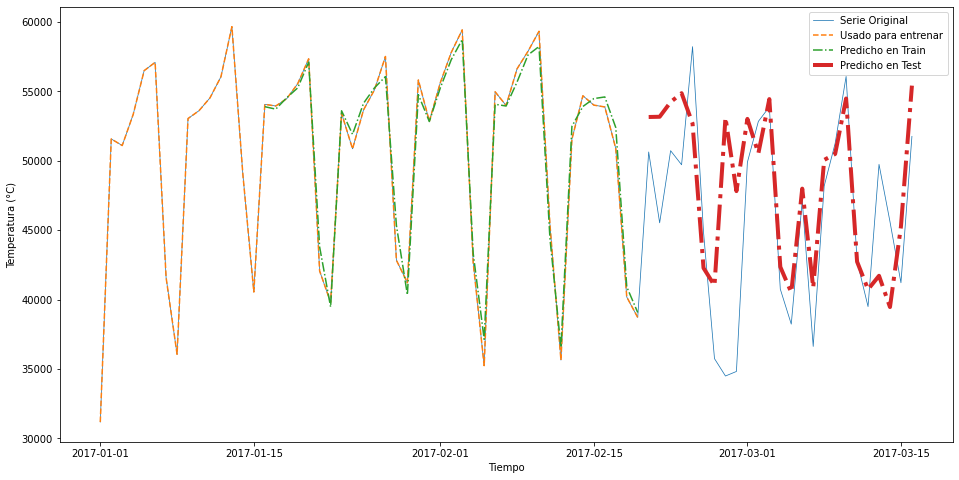

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(cantidad.index[:length_total], cantidad[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(cantidad.index[:N_train + look_back], cantidad[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(cantidad.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(cantidad.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Temperatura (°C)')
plt.show()

Cálculo del error

In [ ]:

MSE = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(MSE))

MSE = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(MSE))

Error en Train: 922.9815058184307
Error en Test: 5883.320871187292


**2.5 Multi Step Prediction**

In [ ]:

y_ms_test_pred = []
x = X_test[0,:] # arrancamos con la primera instancias del conjunto de test
for i in range(y_test.size):
    y_os_pred = rf.predict(x.reshape(1,-1))
    y_ms_test_pred.append(y_os_pred)
    x = np.append(x[1:], y_os_pred)
y_ms_test_pred = np.array(y_ms_test_pred)

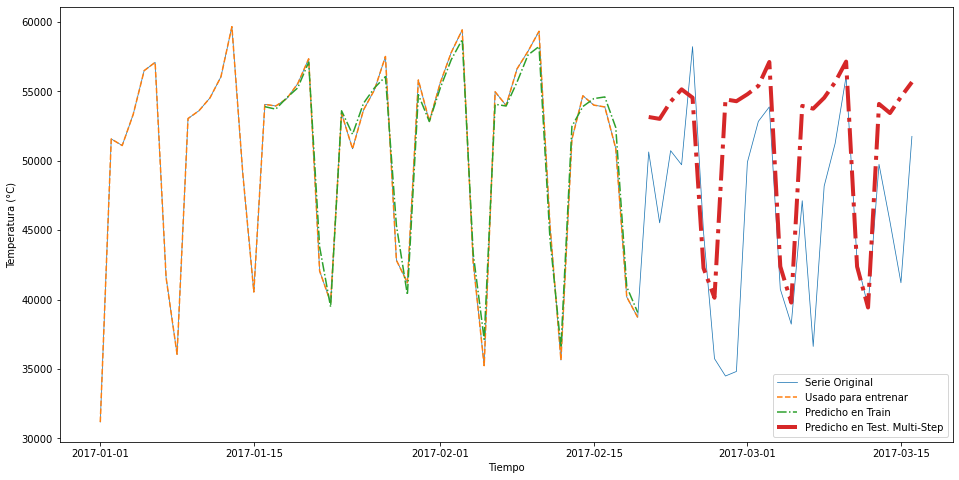

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(cantidad.index[:length_total], cantidad[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(cantidad.index[:N_train + look_back], cantidad[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(cantidad.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(cantidad.index[N_train+look_back: length_total], y_ms_test_pred,'-.', lw = 4, label = 'Predicho en Test. Multi-Step')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Temperatura (°C)')
plt.show()

Calculamos el error

In [ ]:
MSE = mean_squared_error(y_test, y_ms_test_pred)
print('Error en Train:',np.sqrt(MSE))

Error en Train: 8101.364019534982


Conclusiones predominantes:

* Utilizando como métrica de evaluación el error cuadrático medio, se puede observar que el error es un 28% menor que en el método de multi step prediction. 

# **Prophet**

Referencia: https://machinelearningmastery.com/time-series-forecasting-with-prophet-in-python/

In [ ]:
import fbprophet
from fbprophet import Prophet

Punto de partida:

In [ ]:
cantidad=diario.cantidad_pasos

In [ ]:
df_cantidad=pd.DataFrame(cantidad)

In [ ]:
df_cantidad.reset_index(inplace=True)

Se configura el dataframe con el formato correspondiente para utilizar la librería:

In [ ]:
df_cantidad=df_cantidad.rename(columns={'fecha':'ds','cantidad_pasos':'y'})

In [ ]:
df_cantidad

,ds,y
0,2017-01-01,31183
1,2017-01-02,51568
2,2017-01-03,51093
3,2017-01-04,53332
4,2017-01-05,56486
...,...,...
1085,2019-12-27,40182
1086,2019-12-28,30681
1087,2019-12-29,26259
1088,2019-12-30,34523


Se realizará la predicción para el 2020, utilizando los datos de los años: 2017-2018-2019.

In [ ]:
m = Prophet()
m.fit(df_cantidad)  # df is a pandas.DataFrame with 'y' and 'ds' columns
future = m.make_future_dataframe(periods=365)
df_2=m.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
df_2[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1450,2020-12-26,29744.174979,23340.155565,36120.248049
1451,2020-12-27,24998.786040,18814.388981,31489.460448
1452,2020-12-28,30685.196384,23673.917971,37654.521329
1453,2020-12-29,31536.118824,25472.341309,37958.238612
1454,2020-12-30,33158.116135,26898.434926,39687.884090


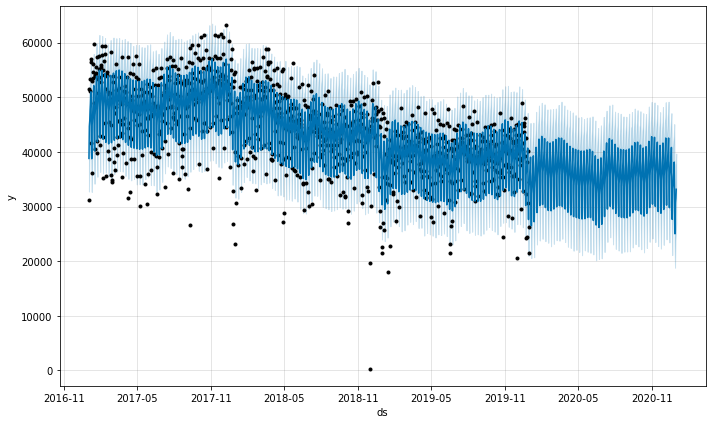

In [ ]:
fig1 = m.plot(df_2)

Conclusión preliminar:
* La predicción muestra la tendencia de reducción de cantidad de pasos a lo largo de los años y, de acuerdo al análisis de la sección anterior, esto es predecible que así sea porque el uso del pago en efectivo.



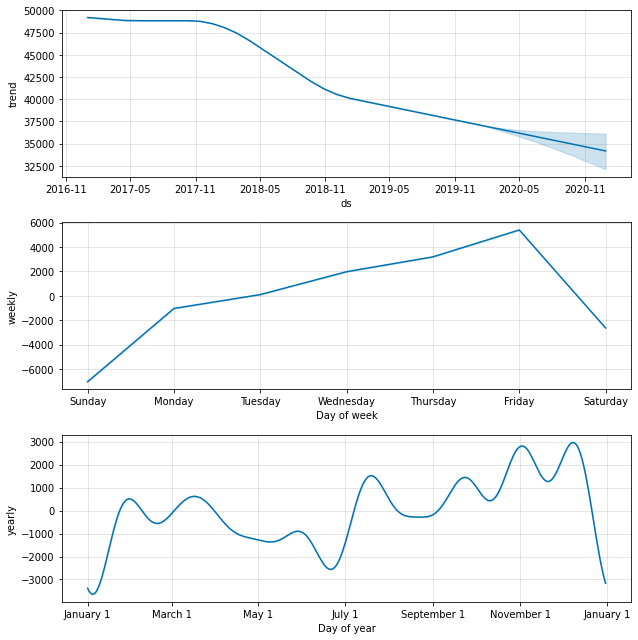

In [ ]:
fig2 = m.plot_components(df_2)

* Con respecto a la tendencia semanal se observa una reducción para el fin de semana.
* En la observación mensual se aprecia un incremento en Julio y una baja en Enero.

# **Para pensar, investigar y, opcionalmente, implementar**

* ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?

La forma de incorporar más features para realizar la predicción es tener un enfoque de aprendizaje automático supervisado, como puede ser el de redes neuronales. 

Tomando como referencia el siguiente artículo: https://www.aprendemachinelearning.com/pronostico-de-series-temporales-con-redes-neuronales-en-python/

De acuerdo a la consigna, tipo de vehículo, forma de pago, sentido, día de la semana, son variables categóricas dentro del conjunto de datos de nuestro dataset de la serie de tiempo. Atendiendo a esta cuestión, en primera instancia convertiría las variables categóricas en numéricas con padas get dummies.

Se toma la serie temporal y se la convierte en un “problema de tipo supervisado“ para poder alimentar la red neuronal y poder entrenarla con backpropagation. 

Lo que haremos -en este ejemplo- es tomar los 7 días previos para “obtener” el octavo. Podríamos intentar entrenar a la red con 2, ó 3 días. O también podríamos tener 1 sola salida, ó hasta “atrevernos” intentar predecir más de un “día futuro”.

**La implementación de esto, al integrar los 3 módulos, lo dejo como TP Nº4.**




* ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?

En principio, me enimaría a decir que las diferencias se pueden llegar a detectar con la acumulación del tráfico, el cambio de flujo debido al cambio de estación de peaje para disminuir el tiempo de espera.

**Implementación - Data 2018**

In [ ]:
data_2018

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115
...,...,...,...,...,...,...,...,...,...,...
1375903,2018,2018-12-31,21,22,Lunes,Sarmiento,Provincia,Liviano,TELEPASE,62
1375904,2018,2018-12-31,21,22,Lunes,Sarmiento,Provincia,Pesado,TELEPASE,1
1375905,2018,2018-12-31,22,23,Lunes,Sarmiento,Provincia,Liviano,NO COBRADO,3
1375906,2018,2018-12-31,22,23,Lunes,Sarmiento,Provincia,Liviano,TELEPASE,13


Observo las cantidades de estación para el año 2018 

In [ ]:
data_2018.estacion.unique()

array(['Alberdi', 'Avellaneda', 'Dellepiane Centro', 'Dellepiane Liniers',
       'Illia', 'Retiro', 'Salguero', 'Sarmiento'], dtype=object)

In [ ]:
mask_alberdi=data_2018['estacion']=='Alberdi'
mask_avellaneda=data_2018['estacion']=='Avellaneda'
mask_dellepiane_c=data_2018['estacion']=='Dellepiane Centro'
mask_dellepiane_l=data_2018['estacion']=='Dellepiane Liniers'
mask_illia=data_2018['estacion']=='Illia'
mask_retiro=data_2018['estacion']=='Retiro'
mask_salguero=data_2018['estacion']=='Salguero'
mask_sarmiento=data_2018['estacion']=='Sarmiento'


In [ ]:
data_2018_alberdi=data_2018[mask_alberdi]
data_2018_avellaneda=data_2018[mask_avellaneda]
data_2018_dellepiane_c=data_2018[mask_dellepiane_c]
data_2018_dellepiane_l=data_2018[mask_dellepiane_l]
data_2018_illia=data_2018[mask_illia]
data_2018_retiro=data_2018[mask_retiro]
data_2018_salguero=data_2018[mask_salguero]
data_2018_sarmiento=data_2018[mask_sarmiento]

In [ ]:
data_2018_alberdi

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115
...,...,...,...,...,...,...,...,...,...,...
1373227,2018,2018-12-31,22,23,Lunes,Alberdi,Provincia,Pesado,EFECTIVO,1
1373228,2018,2018-12-31,22,23,Lunes,Alberdi,Provincia,Pesado,TELEPASE,2
1373229,2018,2018-12-31,23,0,Lunes,Alberdi,Provincia,Liviano,NO COBRADO,30
1373230,2018,2018-12-31,23,0,Lunes,Alberdi,Provincia,Liviano,TELEPASE,1


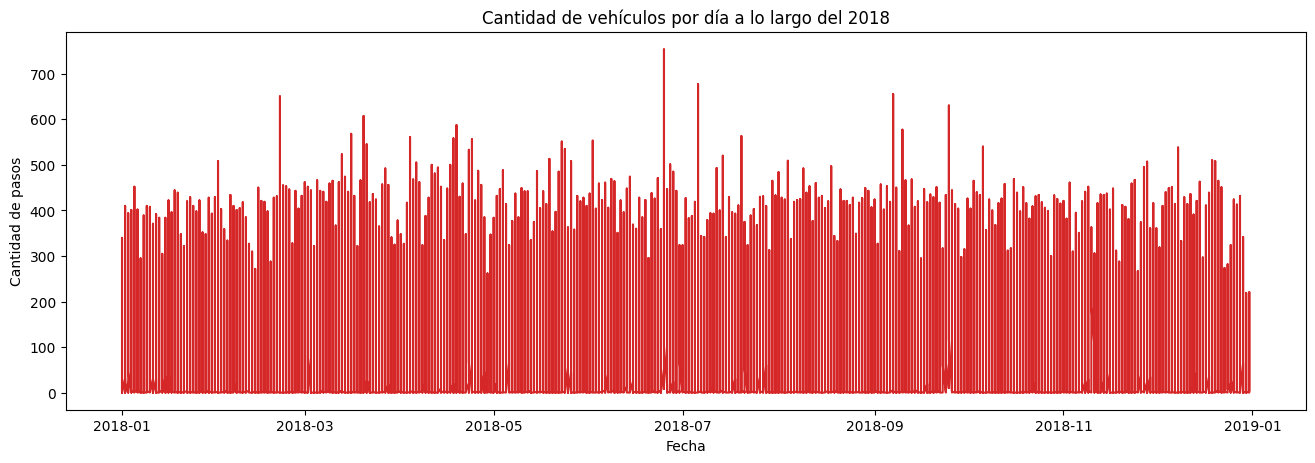

In [ ]:
# Draw Plot
def plot_df(data, x, y, title="", xlabel='Fecha', ylabel='Cantidad de pasos', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(data_2018_alberdi, x=data_2018_alberdi.fecha, y=data_2018_alberdi.cantidad_pasos, title='Cantidad de vehículos por día a lo largo del 2018')   

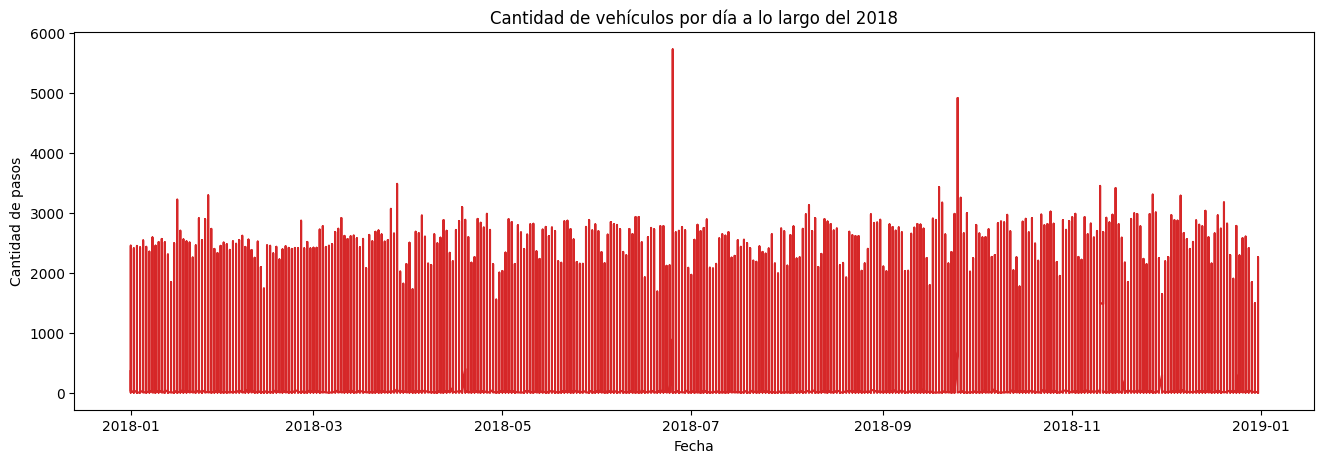

In [ ]:
plot_df(data_2018_avellaneda, x=data_2018_avellaneda.fecha, y=data_2018_avellaneda.cantidad_pasos, title='Cantidad de vehículos por día a lo largo del 2018')   

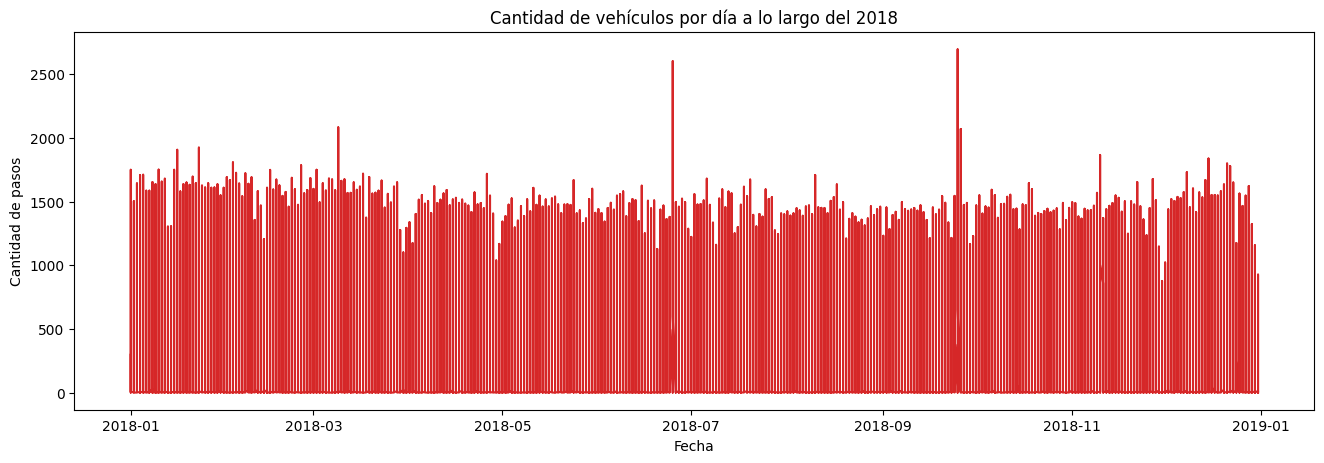

In [ ]:
plot_df(data_2018_dellepiane_c, x=data_2018_dellepiane_c.fecha, y=data_2018_dellepiane_c.cantidad_pasos, title='Cantidad de vehículos por día a lo largo del 2018')  

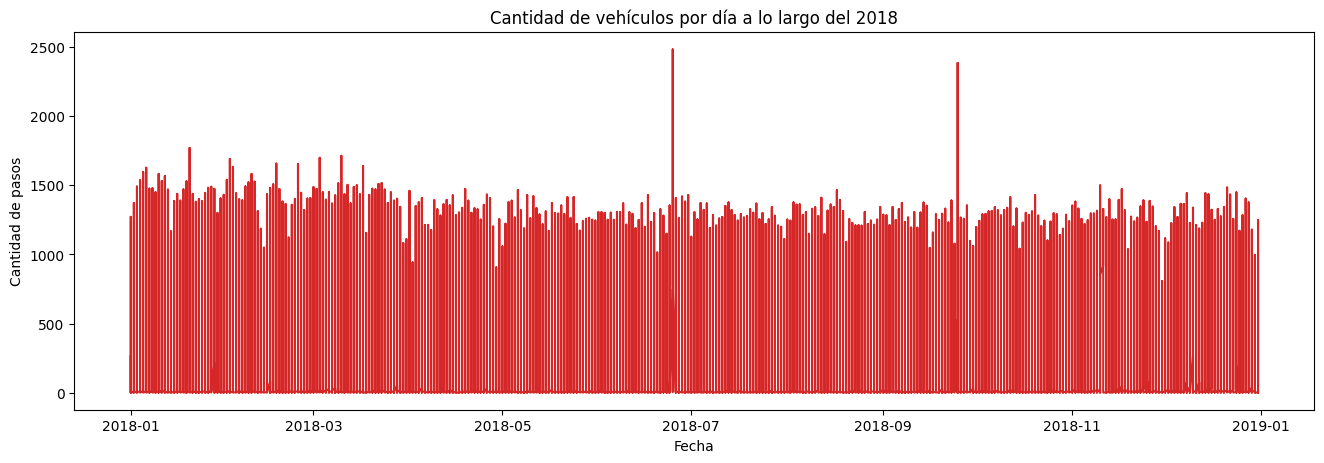

In [ ]:
plot_df(data_2018_dellepiane_l, x=data_2018_dellepiane_l.fecha, y=data_2018_dellepiane_l.cantidad_pasos, title='Cantidad de vehículos por día a lo largo del 2018')  

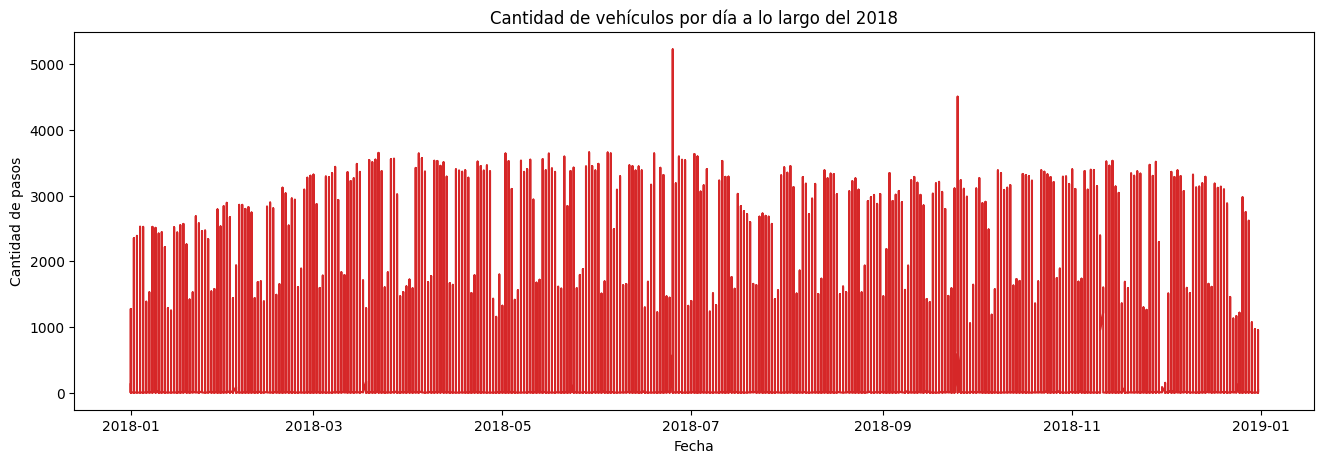

In [ ]:
plot_df(data_2018_illia, x=data_2018_illia.fecha, y=data_2018_illia.cantidad_pasos, title='Cantidad de vehículos por día a lo largo del 2018')  

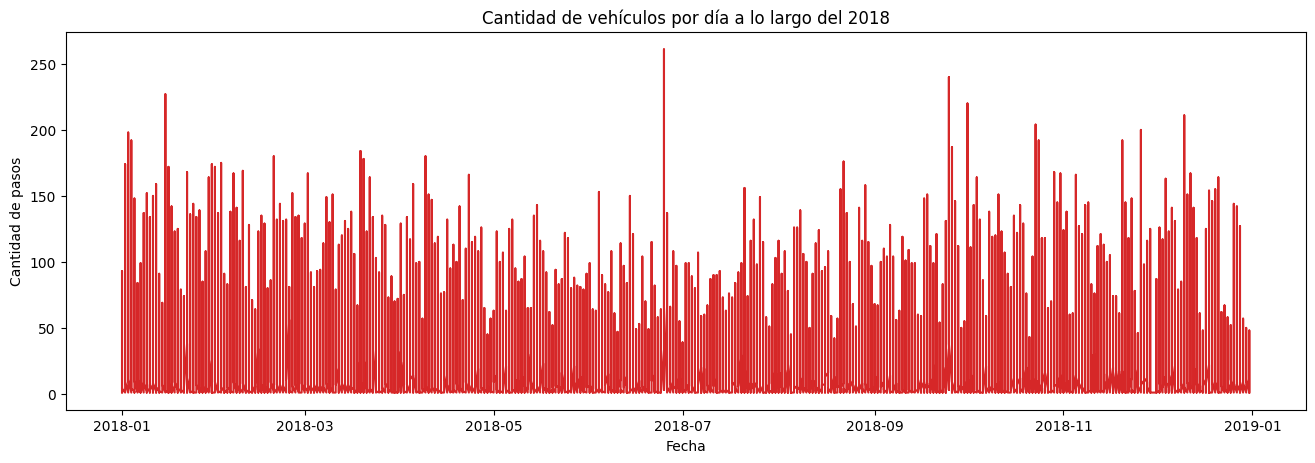

In [ ]:
plot_df(data_2018_retiro, x=data_2018_retiro.fecha, y=data_2018_retiro.cantidad_pasos, title='Cantidad de vehículos por día a lo largo del 2018')  

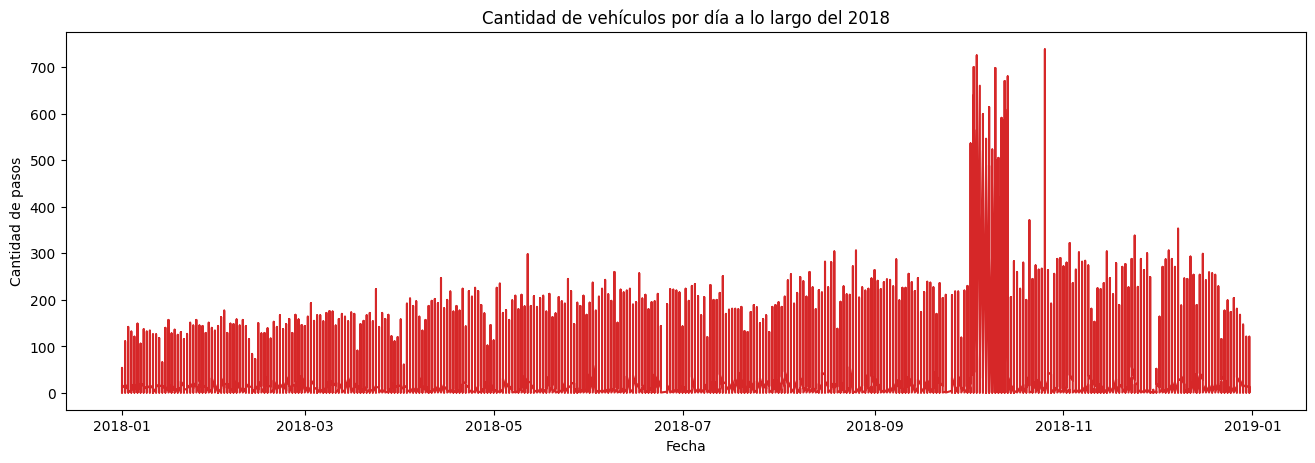

In [ ]:
plot_df(data_2018_salguero, x=data_2018_salguero.fecha, y=data_2018_salguero.cantidad_pasos, title='Cantidad de vehículos por día a lo largo del 2018')  

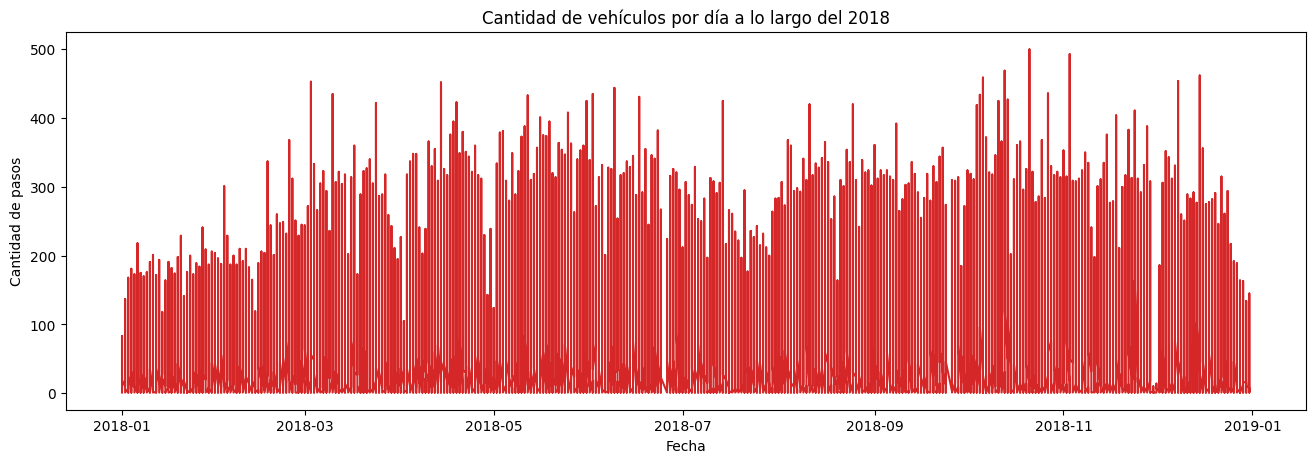

In [ ]:
plot_df(data_2018_sarmiento, x=data_2018_sarmiento.fecha, y=data_2018_sarmiento.cantidad_pasos, title='Cantidad de vehículos por día a lo largo del 2018')  

* ¿Hay algo que te gustaría investigar o probar?

Sí, me parece que podría ser interesante utilizar algún modelo de Machine Learning visto en el módulo 2 para la predicción de series de tiempo. 

Tomando como referencia: https://machinelearningmastery.com/random-forest-for-time-series-forecasting/

Implementando el modelo de Random Forest

Los algoritmos de aprendizaje supervisado pueden utilizarse para modelar las dependencias que presente la serie temporal. No obstante, para ello es necesario
considerar los retardos de la serie temporal como variables predictoras. Además, es necesario entrenar el algoritmo con las observaciones hasta un determinado
instante y validar el modelo resultante con las observaciones desde ese mismo instante.

Preparación de datos de la serie de tiempo para la implementación de un modelo supervisado. 

Partiendo de la base de datos de cantidad

In [ ]:
cantidad

fecha
2017-01-01    31183
2017-01-02    51568
2017-01-03    51093
2017-01-04    53332
2017-01-05    56486
              ...  
2019-12-27    40182
2019-12-28    30681
2019-12-29    26259
2019-12-30    34523
2019-12-31    21447
Name: cantidad_pasos, Length: 1090, dtype: int64

Utilizando como referencia la siguiente función: https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/

In [ ]:
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

Transformación de la serie temporal en un dataset de aprendizaje supervisado

In [ ]:
# Función para transformar una serie de tiempo en dataset para el aprendizaje supervisado 
def series_to_supervised(cantidad, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(cantidad) is list else cantidad.shape[1]
	df = DataFrame(cantidad)
	cols = list()
	# se arma la secuencia
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# pronóstico de la secuencia
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# se agrupan
	agg = concat(cols, axis=1)
	# Borrar filas con valores Nan
	if dropnan:
		agg.dropna(inplace=True)
	return agg.values

Aplicar funciones sobre el dataset original

Punto de partida:

In [ ]:
cantidad

fecha
2017-01-01    31183
2017-01-02    51568
2017-01-03    51093
2017-01-04    53332
2017-01-05    56486
              ...  
2019-12-27    40182
2019-12-28    30681
2019-12-29    26259
2019-12-30    34523
2019-12-31    21447
Name: cantidad_pasos, Length: 1090, dtype: int64

In [ ]:
data_frame=pd.DataFrame(cantidad) 

>expected=46128.0, predicted=45341.1
>expected=39303.0, predicted=42067.2
>expected=32337.0, predicted=37714.3
>expected=42531.0, predicted=40603.9
>expected=24220.0, predicted=40616.5
>expected=24349.0, predicted=30203.7
>expected=38168.0, predicted=34712.0
>expected=40182.0, predicted=37573.7
>expected=30681.0, predicted=40680.0
>expected=26259.0, predicted=39247.9
>expected=34523.0, predicted=35359.4
>expected=21447.0, predicted=37468.2
MAE: 6584.710


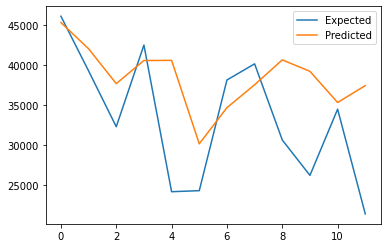

In [ ]:

from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
 

 
# Train test split
def train_test_split(data, n_test):
 return data[:-n_test, :], data[-n_test:, :]
 
# fit random forest y predicción one step
def random_forest_forecast(train, testX):
 # transformación de la lista a un arreglo
 train = asarray(train)
 # split 
 trainX, trainy = train[:, :-1], train[:, -1]
 # entrenamiento del modelo
 model = RandomForestRegressor(n_estimators=1000)
 model.fit(trainX, trainy)
 # predicción
 yhat = model.predict([testX])
 return yhat[0]
 
# Walk forward validation
def walk_forward_validation(data, n_test):
 predictions = list()
 # test train split
 train, test = train_test_split(data, n_test)
 # historial con los datos de entrenamiento
 history = [x for x in train]
 # pasando por el rango de test
 for i in range(len(test)):
 # split test row into input and output columns
  testX, testy = test[i, :-1], test[i, -1]
 # ajuste del modelo y predicción
  yhat = random_forest_forecast(history, testX)
 # se almacenan las predicciones
  predictions.append(yhat)
 # agregar el cálculo actual al loop
  history.append(test[i])
 # imprimir los valores del progreso
  print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
 # error de preducción
 error = mean_absolute_error(test[:, -1], predictions)
 return error, test[:, -1], predictions
 
# Carga del datafreme
series = data_frame
values = series.values
# Transformación de la serie de tiempo para el aprendizaje supervisado 
data = series_to_supervised(values, n_in=6)
# Evaluación
mae, y, yhat = walk_forward_validation(data, 12)
print('MAE: %.3f' % mae)
# plot esperado y predicho
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()

Conclusiones preliminares: \\

* Si bien en el modelo se aprecia que algunas tendencias en subidas y bajadas en las predicciones aparecen, el error de predicción es muy grande. Se observa cuatitativamente en el alto valor del error cuadrático medio. 




Conclusiones finales:

* Se abordó el tema de series de tiempos pasando por las caracterización de la misma a partir de sus componentes. 
* Observar los aspectos cualitatitos y cuantitativos del comportamiento estacional por mes, por año y por día.
* Se investigó e implementó sobre transformaciones de series para que sean estacionarias.
* Se investigó y aplico distintos modelos para realizar predicciones y se seleccionó el error cuadrático medio para realizar las predicciones.
* Se seleccionó el suavizado exponencial simple como modelo Benchmark
* Se obtuvo el menor error con el método de One Step Prediction.
* Se realizó la conversión de la serie de tiempo en dataframe para un modelo de aprendizaje supervisado, en particular utilizando RandomForest.
* Se observó que con el modelo de aprendizaje supervisado el error de predicción en grande pero el modelo tiene a seguir la tendencia del comportamiento.